## Module 4: *(Template)*

**RENAME THE FILE TO INCLUDE YOUR COMPANY, GROUP NUMBER, AND LAST NAMES**

**E.G. KAMEN1_GROVES_MODULE_4.IPYNB**

## Team Members:
Julena and William

## Project Title:
COVID-19 Italy 2020



## Project Goal:
This project seeks to model COVID-19 (Italy 2020) with SIR to predict the future of this disease.

## Disease Background:

Using your assigned disease, fill in the following bullet points. 

* Prevalence & incidence
    * There was a very large increase in total mortality in Italy in 2020: from March to December, there were ~ 99,334 “excess” deaths compared to expected baselines — about +18.8% over normal. (https://pubmed.ncbi.nlm.nih.gov/35481574/)
    * The official COVID-19 death toll in that period under-reported the total impact: many of the excess deaths weren’t recorded in surveillance systems, indicating that the “true” disease burden was much higher. (https://pubmed.ncbi.nlm.nih.gov/35481574/)
    * Modeling estimates suggest that much more of the Italian population was infected than official case counts show: for example, one demographic-scaling model estimated ~1.4 million total infections in Italy by mid-2020, which was many times higher than confirmed cases (https://arxiv.org/abs/2004.12836?utm_source=chatgpt.com)
* Economic burden
    * The total estimated permanent productivity loss due to premature mortality from COVID-19 in Italy (up to 28 April 2020) was about EUR 300 million. 
    * The estimated temporary productivity loss (due to work absenteeism) during that same period was about EUR 100 million.
    (https://pmc.ncbi.nlm.nih.gov/articles/PMC7345321/)
* Risk factors (genetic, lifestyle) & Societal determinants
    * Your risk of catching COVID-19 is higher when you live with someone who has it, spend time in poorly ventilated or crowded indoor spaces, or have close contact (especially for >30 minutes) with an infected person.
    * Older age (65+), babies under 6 months, and people with chronic conditions (like heart disease, lung disease, kidney/liver disease, obesity, or a weakened immune system) are more likely to develop serious COVID-19 illness.
    (https://www.mayoclinic.org/diseases-conditions/coronavirus/symptoms-causes/syc-20479963)
* Symptoms
    * Most common symptoms:fever, cough, tiredness, loss of taste or smell.
    * Less common symptoms: sore throat, headache, aches and pains, diarrhoea, a rash on skin, or discolouration of fingers or toes, red or irritated eyes.
    * Serious symptoms: difficulty breathing or shortness of breath, loss of speech or mobility, or confusion, chest pain.
    (https://www.who.int/health-topics/coronavirus#tab=tab_3)
* Diagnosis
    * You can use at-home FDA-approved COVID-19 tests, or go through your healthcare provider, especially if you have symptoms or have been exposed.
    * If you're symptomatic, test right away. If you were exposed but have no symptoms, wait ~5 days after exposure before testing to improve accuracy.
    (https://www.mayoclinic.org/diseases-conditions/coronavirus/symptoms-causes/syc-20479963)
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
    * How the virus enters the body: SARS-CoV-2 attaches to ACE2 receptors on human cells (especially in the lungs) and uses host enzymes like TMPRSS2 to enter and begin infection.
    * How it causes damage: Infection triggers an intense inflammatory response (“cytokine storm”) and can injure blood vessels, leading to problems like clotting and organ damage.
    * Why multiple organs are affected: Because ACE2 receptors exist in the lungs, heart, kidneys, intestines and blood vessels, the virus can spread beyond the lungs and cause widespread symptoms.
    (https://pmc.ncbi.nlm.nih.gov/articles/PMC8592035/)

## Dataset: 
* Github page: https://github.com/CSSEGISandData/COVID-19
* The dataset analyzed is the Italy COVID-19 cumulative case data for 2020, sourced from the COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University. It was collected as part of JHU’s global COVID-19 tracking dashboard, which gathered daily reports of confirmed cases from sources like the World Health Organization (WHO), European CDC, and national news and health agencies.
Our instructor cleaned up the data so every group has a 2-column data-frame: date and confirmed cases. The dates range from March 2020 to July 2020, and the range of people infected goes from 1,694 to 247,537. From these cumulative counts, we can calculate daily new cases and estimate the number of susceptible, infectious, and recovered individuals over time. The data are measured as counts of people and are organized by date, which makes it suitable for modeling the spread of COVID-19 using approaches like the SIR model.

Cumulative infections over time

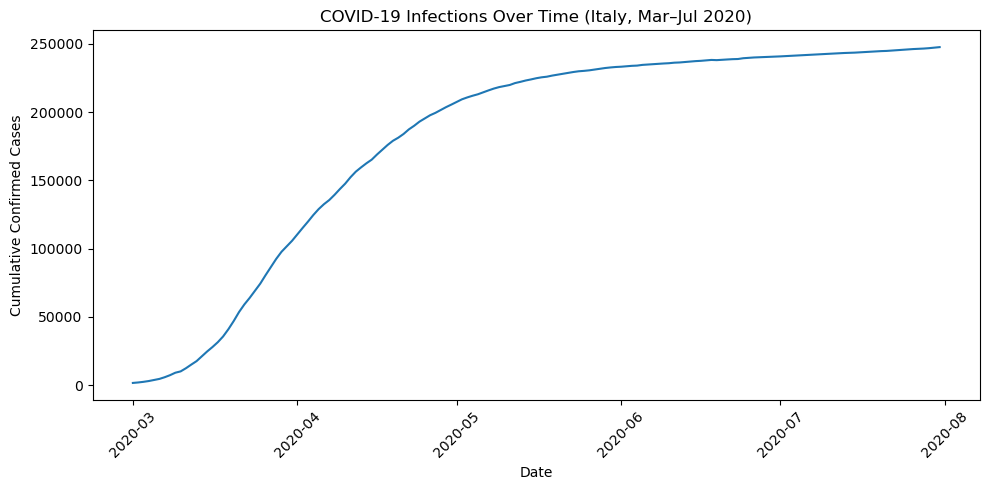

In [ ]:
# infections over time
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("/Users/julenapatel/Downloads/Computational BME/Module 4/Data/covid_italy_data_march_july_2020_cumulative.csv")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Plot infections over time
plt.figure(figsize=(10,5))
plt.plot(df['date'], df['confirmed_cases'])

plt.xlabel("Date")
plt.ylabel("Cumulative Confirmed Cases")
plt.title("COVID-19 Infections Over Time (Italy, Mar–Jul 2020)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Non-cumulative infections over time

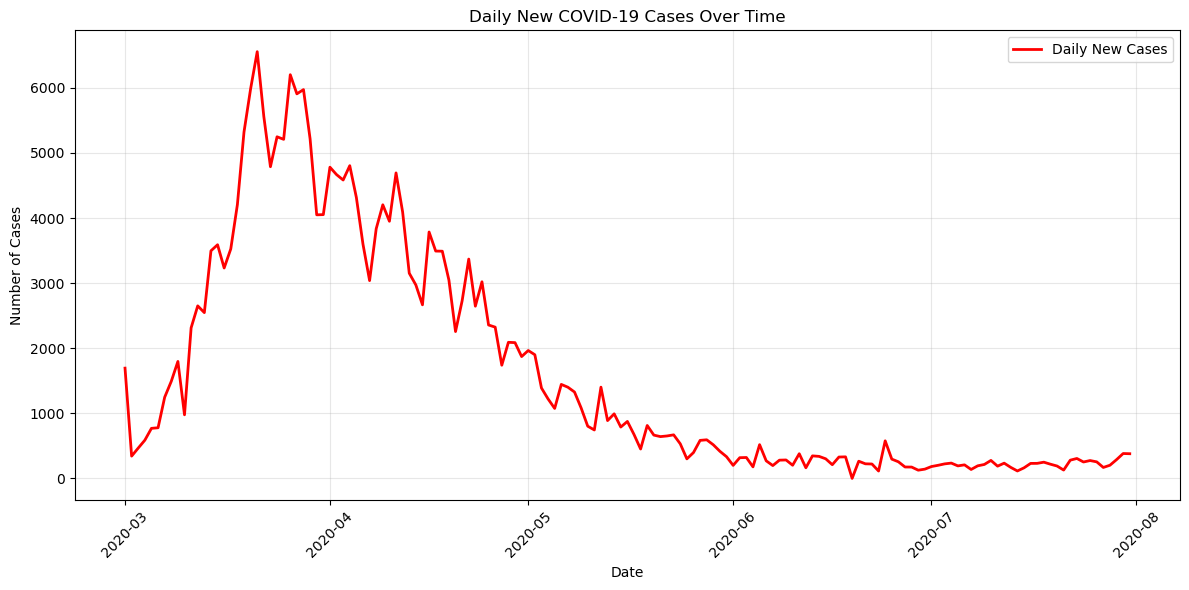

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. LOAD YOUR DATASET
df = pd.read_csv("/Users/julenapatel/Downloads/Computational BME/Module 4/Data/covid_italy_data_march_july_2020_cumulative.csv")
df['date'] = pd.to_datetime(df['date'])

# 2. Convert cumulative cases to S, I, R
def convert_cumulative_to_SIR(df, date_col='date', cumulative_col='cumulative_cases',
                               population=60_000_000, infectious_period=8, recovered_col=None,
                               new_case_col='new_cases', I_col='I_est', R_col='R_est', S_col='S_est'):
    """
    Convert cumulative reported cases into S, I, R estimates for SIR modeling.
    - new_cases = diff(cumulative)
    - I_est = rolling sum(new_cases, window=infectious_period)
    - R_est = cumulative cases MINUS currently infectious
    - S_est = population - I_est - R_est
    
    Returns a copy of the dataframe with the added columns.
    """
    df = df.copy()
    
    # Ensure date column sorted if present
    if date_col in df.columns:
        df[date_col] = pd.to_datetime(df[date_col])
        df = df.sort_values(date_col).reset_index(drop=True)
    
    if cumulative_col not in df.columns:
        raise ValueError(f"Column '{cumulative_col}' not found in dataframe.")
    
    # Compute new cases (incident)
    df[new_case_col] = df[cumulative_col].diff().fillna(df[cumulative_col].iloc[0])
    df[new_case_col] = df[new_case_col].clip(lower=0)
    
    # Estimate I(t) as rolling sum over infectious_period
    if infectious_period <= 0:
        raise ValueError("infectious_period must be positive integer.")
    df[I_col] = df[new_case_col].rolling(window=infectious_period, min_periods=1).sum()
    
    # Estimate R(t) - Total cumulative cases MINUS currently infectious
    if recovered_col and recovered_col in df.columns:
        df[R_col] = df[recovered_col].fillna(0)
    else:
        df[R_col] = df[cumulative_col] - df[I_col]
        df[R_col] = df[R_col].clip(lower=0)
    
    # Compute S(t)
    df[S_col] = population - df[I_col] - df[R_col]
    df[S_col] = df[S_col].clip(lower=0)
    
    # Ensure numeric and non-negative
    for col in [new_case_col, I_col, R_col, S_col]:
        df[col] = df[col].astype(float).clip(lower=0)
    
    return df

# Apply the conversion
df = convert_cumulative_to_SIR(df, cumulative_col='confirmed_cases')

# Extract the new_cases (daily, non-cumulative) column
daily_cases = df['new_cases']

# 3. Plot daily new cases over time
plt.figure(figsize=(12,6))
plt.plot(df['date'], daily_cases, label='Daily New Cases', color='red', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.title("Daily New COVID-19 Cases Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

SIR MODEL

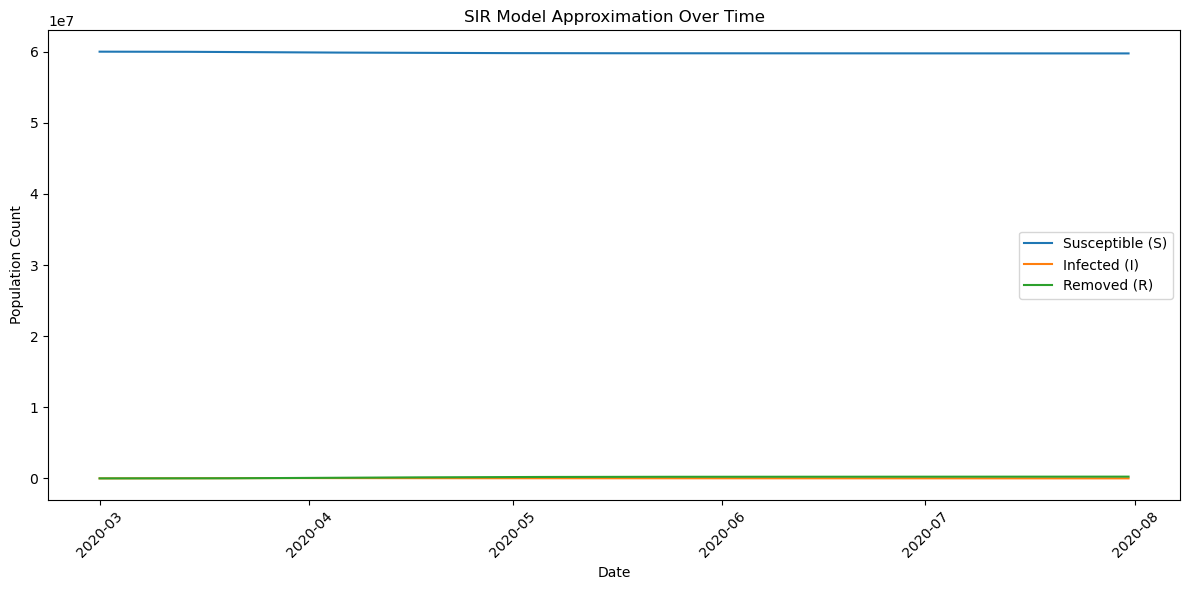

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. LOAD YOUR DATASET
df = pd.read_csv("/Users/julenapatel/Downloads/Computational BME/Module 4/Data/covid_italy_data_march_july_2020_cumulative.csv")
df['date'] = pd.to_datetime(df['date'])

# 2. Convert cumulative cases to S, I, R
def convert_cumulative_to_SIR(df, date_col='date', cumulative_col='cumulative_cases',
                               population=60_000_000, infectious_period=8, recovered_col=None,
                               new_case_col='new_cases', I_col='I_est', R_col='R_est', S_col='S_est'):
    """
    Convert cumulative reported cases into S, I, R estimates for SIR modeling.
    - new_cases = diff(cumulative)
    - I_est = rolling sum(new_cases, window=infectious_period)
    - R_est = cumulative cases MINUS currently infectious
    - S_est = population - I_est - R_est
    
    Returns a copy of the dataframe with the added columns.
    """
    df = df.copy()
    
    # Ensure date column sorted if present
    if date_col in df.columns:
        df[date_col] = pd.to_datetime(df[date_col])
        df = df.sort_values(date_col).reset_index(drop=True)
    
    if cumulative_col not in df.columns:
        raise ValueError(f"Column '{cumulative_col}' not found in dataframe.")
    
    # Compute new cases (incident)
    df[new_case_col] = df[cumulative_col].diff().fillna(df[cumulative_col].iloc[0])
    df[new_case_col] = df[new_case_col].clip(lower=0)
    
    # Estimate I(t) as rolling sum over infectious_period
    if infectious_period <= 0:
        raise ValueError("infectious_period must be positive integer.")
    df[I_col] = df[new_case_col].rolling(window=infectious_period, min_periods=1).sum()
    
    # Estimate R(t) - Total cumulative cases MINUS currently infectious
    if recovered_col and recovered_col in df.columns:
        df[R_col] = df[recovered_col].fillna(0)
    else:
        df[R_col] = df[cumulative_col] - df[I_col]
        df[R_col] = df[R_col].clip(lower=0)
    
    # Compute S(t)
    df[S_col] = population - df[I_col] - df[R_col]
    df[S_col] = df[S_col].clip(lower=0)
    
    # Ensure numeric and non-negative
    for col in [new_case_col, I_col, R_col, S_col]:
        df[col] = df[col].astype(float).clip(lower=0)
    
    return df

# Apply the conversion
df = convert_cumulative_to_SIR(df, cumulative_col='confirmed_cases')

# Extract S, I, R columns from the returned dataframe
S = df['S_est']
I = df['I_est']
R = df['R_est']

# 3. Plot S, I, R over time
plt.figure(figsize=(12,6))
plt.plot(df['date'], S, label='Susceptible (S)')
plt.plot(df['date'], I, label='Infected (I)')
plt.plot(df['date'], R, label='Removed (R)')
plt.xlabel("Date")
plt.ylabel("Population Count")
plt.title("SIR Model Approximation Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Analyis: 

### Methods

*IN A SUMMARY, DESCRIBE THE METHODS YOU USED TO ANALYZE AND MODEL THE DATA.*


Using Euler's method to model our data with varying beta and gamma values.

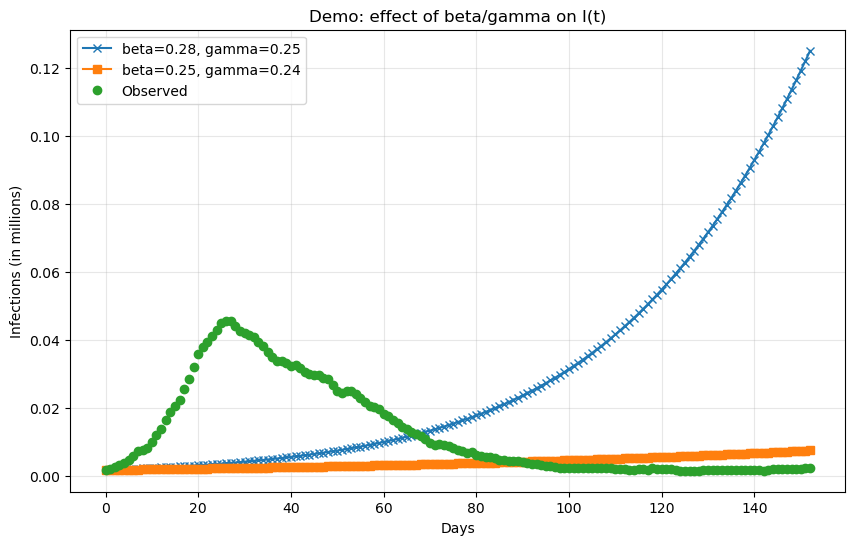

MSE for beta=0.28, gamma=0.25: 0.002134
MSE for beta=0.25, gamma=0.24: 0.000301


In [21]:
# Euler integrator function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def euler_sir(beta, gamma, S0, I0, R0, t, N):
    """
    Solve the SIR model using Euler's method.
    """
    S = np.empty(len(t), float)
    I = np.empty(len(t), float)
    R = np.empty(len(t), float)
    S[0], I[0], R[0] = S0, I0, R0
    
    for n in range(len(t) - 1):
        dt = t[n + 1] - t[n]
        dS = -beta * S[n] * I[n] / N
        dI = beta * S[n] * I[n] / N - gamma * I[n]
        dR = gamma * I[n]
        S[n + 1] = S[n] + dS * dt
        I[n + 1] = I[n] + dI * dt
        R[n + 1] = R[n] + dR * dt
    
    return S, I, R

# Load your data
df_full = pd.read_csv('/Users/julenapatel/Downloads/Computational BME/Module 4/Data/covid_italy_data_march_july_2020_cumulative.csv')

# CREATE I_est from cumulative confirmed_cases
df_full['new_cases'] = df_full['confirmed_cases'].diff().fillna(df_full['confirmed_cases'].iloc[0])
recovery_period = 8
df_full['I_est'] = df_full['new_cases'].rolling(window=recovery_period, min_periods=1).sum()
df_full['I_est'] = df_full['I_est'] / 1_000_000  # Convert to millions

# Define total population (in millions)
N = 60.0  # Italy's population is about 60 million

I_obs = df_full['I_est'].values.astype(float)
t_obs = np.linspace(0, len(I_obs)-1, len(I_obs))
I0_obs = df_full.iloc[0]['I_est']
R0_obs = 0.0
S0_obs = N - I0_obs - R0_obs

beta1 = 0.28
gamma1 = 1/4
beta2 = 0.25
gamma2 = 0.24

S1, I1, R1 = euler_sir(beta1, gamma1, S0_obs, I0_obs, R0_obs, t_obs, N)
S2, I2, R2 = euler_sir(beta2, gamma2, S0_obs, I0_obs, R0_obs, t_obs, N)

plt.figure(figsize=(10, 6))
plt.plot(t_obs, I1, label=f'beta={beta1}, gamma={gamma1}', marker='x')
plt.plot(t_obs, I2, label=f'beta={beta2}, gamma={gamma2}', marker='s')
plt.plot(t_obs, I_obs, 'o', label='Observed')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Infections (in millions)')
plt.title('Demo: effect of beta/gamma on I(t)')
plt.grid(True, alpha=0.3)
plt.show()

print(f"MSE for beta={beta1}, gamma={gamma1}: {np.mean((I1 - I_obs)**2):.6f}")
print(f"MSE for beta={beta2}, gamma={gamma2}: {np.mean((I2 - I_obs)**2):.6f}")

Split euler for future prediction model

Total data points: 153
Training data points: 76
Testing data points: 77

Fitting model on first half of data...
Optimal parameters from training:
  beta = 3.548160
  gamma = 3.416037

EULER'S METHOD - MODEL ERROR ON TEST SET
SSE on second half of data: 0.000695
MSE on second half of data: 0.000009
RMSE on second half of data: 0.003004


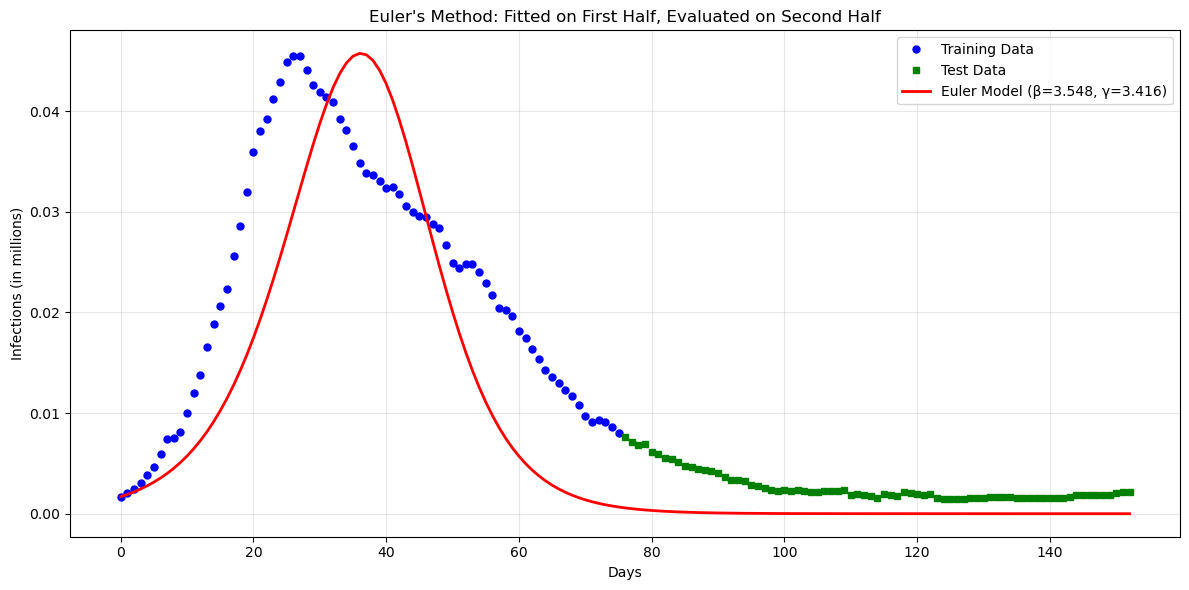

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def euler_sir(beta, gamma, S0, I0, R0, t, N):
    """
    Solve the SIR model using Euler's method.
    """
    S = np.empty(len(t), float)
    I = np.empty(len(t), float)
    R = np.empty(len(t), float)
    S[0], I[0], R[0] = S0, I0, R0
    for n in range(len(t) - 1):
        dt = t[n + 1] - t[n]
        dS = -beta * S[n] * I[n] / N
        dI = beta * S[n] * I[n] / N - gamma * I[n]
        dR = gamma * I[n]
        S[n + 1] = S[n] + dS * dt
        I[n + 1] = I[n] + dI * dt
        R[n + 1] = R[n] + dR * dt
    return S, I, R

# Load data
df_full = pd.read_csv('/Users/julenapatel/Downloads/Computational BME/Module 4/Data/covid_italy_data_march_july_2020_cumulative.csv')

# CREATE I_est from cumulative confirmed_cases
df_full['new_cases'] = df_full['confirmed_cases'].diff().fillna(df_full['confirmed_cases'].iloc[0])
recovery_period = 8
df_full['I_est'] = df_full['new_cases'].rolling(window=recovery_period, min_periods=1).sum()
df_full['I_est'] = df_full['I_est'] / 1_000_000  # Convert to millions

# Define total population (in millions)
N = 60.0  # Italy's population is about 60 million

I_obs = df_full['I_est'].values.astype(float)
t_obs = np.linspace(0, len(I_obs)-1, len(I_obs))

# Split data into first half (training) and second half (testing)
split_idx = len(I_obs) // 2
I_train = I_obs[:split_idx]
t_train = t_obs[:split_idx]
I_test = I_obs[split_idx:]
t_test = t_obs[split_idx:]

print(f"Total data points: {len(I_obs)}")
print(f"Training data points: {len(I_train)}")
print(f"Testing data points: {len(I_test)}")
print()

# Initial conditions
I0_obs = df_full.iloc[0]['I_est']
R0_obs = 0.0
S0_obs = N - I0_obs - R0_obs

# Define objective function for optimization (MSE on training data)
def objective(params):
    beta, gamma = params
    if beta <= 0 or gamma <= 0:
        return 1e10
    S, I, R = euler_sir(beta, gamma, S0_obs, I0_obs, R0_obs, t_train, N)
    mse = np.mean((I - I_train)**2)
    return mse

# Fit model using first half of data
print("Fitting model on first half of data...")
initial_guess = [0.25, 0.25]
result = minimize(objective, initial_guess, method='Nelder-Mead', 
                  options={'maxiter': 1000, 'xatol': 1e-8})

beta_opt, gamma_opt = result.x
print(f"Optimal parameters from training:")
print(f"  beta = {beta_opt:.6f}")
print(f"  gamma = {gamma_opt:.6f}")
print()

# Generate predictions on FULL time series for visualization
S_full, I_full, R_full = euler_sir(beta_opt, gamma_opt, S0_obs, I0_obs, R0_obs, t_obs, N)

# Calculate SSE on second half (test data)
I_pred_test = I_full[split_idx:]
sse_test = np.sum((I_pred_test - I_test)**2)
mse_test = np.mean((I_pred_test - I_test)**2)

print("=" * 60)
print("EULER'S METHOD - MODEL ERROR ON TEST SET")
print("=" * 60)
print(f"SSE on second half of data: {sse_test:.6f}")
print(f"MSE on second half of data: {mse_test:.6f}")
print(f"RMSE on second half of data: {np.sqrt(mse_test):.6f}")
print("=" * 60)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(t_train, I_train, 'o', label='Training Data', color='blue', markersize=5)
plt.plot(t_test, I_test, 's', label='Test Data', color='green', markersize=5)
plt.plot(t_obs, I_full, '-', label=f'Euler Model (β={beta_opt:.3f}, γ={gamma_opt:.3f})', 
         color='red', linewidth=2)
plt.legend()
plt.xlabel('Days')
plt.ylabel('Infections (in millions)')
plt.title('Euler\'s Method: Fitted on First Half, Evaluated on Second Half')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Analysis
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

In [26]:
## PYTHON CODE TO BUILD AND FIT AN SIR MODEL GOES HERE. INTERSPERSE COMMENTS (IN MARKDOWN) TO EXPLAIN EACH STEP.

## Verify and validate your analysis: 

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*
* In our SIR model, are infected (I) and removed (R) supposed to overlap? Did I miss a value I was supposed to enter?